In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
# import sumo as sm
import os
from traffic_initialization import *
import sys
from bs4 import BeautifulSoup
import tqdm

# New handy interface is here!
# Check interface.py for possible parameters
from interface import Simulation

# Sandbox

100%|███████████████████████████████████████████| 20/20 [01:32<00:00,  4.64s/it]


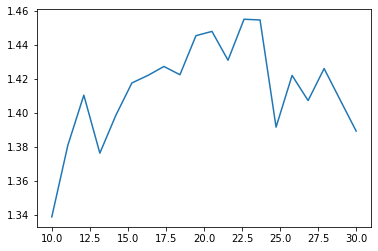

In [2]:
X = np.linspace(10, 30, 20)
Y = np.zeros((X.shape))

for i in tqdm.tqdm(range(X.shape[0])):
    sim = Simulation(start_road='E19', end_road='E3', N=5000, default_gap=2, work_dir='./xml_data/test6', net_data='test6.net.xml')
    sim.set_calibrator(road='E1', lane=['0', '1'], gap=X[i])
    sim.set_calibrator(road='E2', gap=0.1)
    sim.run()
    Y[i] = sim.get_mean_throughput()

plt.plot(X, Y)

100%|███████████████████████████████████████████| 20/20 [01:27<00:00,  4.40s/it]


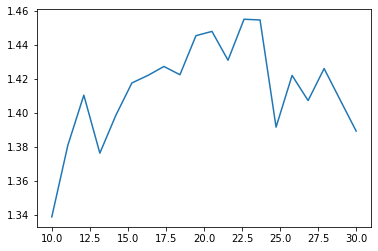

In [3]:
X = np.linspace(10, 30, 20)
Y = np.zeros((X.shape))

for i in tqdm.tqdm(range(X.shape[0])):
    sim = Simulation(start_road='E19', end_road='E3', N=5000, default_gap=2, work_dir='./xml_data/test6', net_data='test6.net.xml')
    sim.set_calibrator(road='E1', lane=['0', '1'], gap=X[i])
    sim.set_calibrator(road='E2', gap=0.1)
    sim.run()
    Y[i] = sim.get_mean_throughput()

plt.plot(X, Y)

100%|███████████████████████████████████████████| 20/20 [01:03<00:00,  3.18s/it]


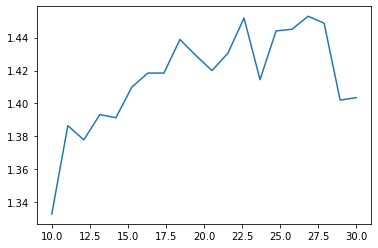

In [4]:
# New handy interface is here!
# Check interface.py for possible parameters
from interface import Simulation

X = np.linspace(10, 30, 20)
Y = np.zeros((X.shape))

for i in tqdm.tqdm(range(X.shape[0])):
    sim = Simulation(start_road='E19', end_road='E3', N=4000, default_gap=2, work_dir='./xml_data/test6', net_data='test6.net.xml')
    sim.set_calibrator(road='E1', lane=['0', '1'], gap=X[i])
    sim.set_calibrator(road='E2', gap=0.1)
    sim.run()
    Y[i] = sim.get_mean_throughput()

plt.plot(X, Y)

In [15]:
# New handy interface is here!
# Check interface.py for possible parameters
from interface import Simulation

X = np.linspace(8, 35, 25)
Y = np.linspace(3000, 8000, 21)
Z = np.zeros((X.shape[0], Y.shape[0]))

for i in tqdm.tqdm(range(X.shape[0])):
    for j in range(Y.shape[0]):
        sim = Simulation(start_road='E19', end_road='E3', N=int(Y[j]), default_gap=2, work_dir='./xml_data/test6', net_data='test6.net.xml')
        sim.set_calibrator(road='E1', lane=['0', '1'], gap=X[i])
        sim.set_calibrator(road='E2', gap=1)
        sim.run()
        Z[i, j] = sim.get_mean_throughput()

#np.savez('res_data/' + 'test6_3', X=X,Y=Y, Z=Z)

100%|██████████████████████████████████████████| 25/25 [49:21<00:00, 118.47s/it]


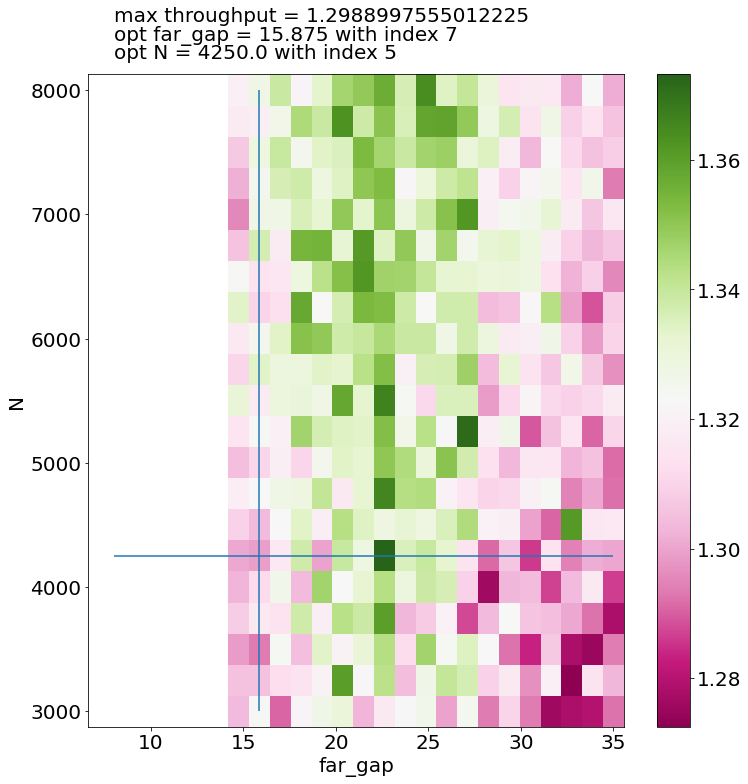

In [17]:
fig, axs = plt.subplots(nrows = 1, ncols = 1,figsize = (12, 12))
plt.rcParams['font.size'] = '20'
xGrid, yGrid = np.meshgrid(X[6:], Y)
xlabel = 'far_gap'
ylabel = 'N'

cmap_set = 'PiYG'
cb = axs.pcolormesh(xGrid, yGrid, np.transpose(Z[6:, :]), cmap = cmap_set)
axs.set_xlabel(xlabel)
axs.set_ylabel(ylabel)
fig.colorbar(cb, ax=axs)

opt_x_ind = np.argmax(np.real(Z[6:, :]))//Z[6:, :].shape[1]
opt_y_ind = np.argmax(np.real(Z[6:, :]))%Z[6:, :].shape[1]


axs.text(X[0], Y[len(Y)-1] + (Y[len(Y)-1] - Y[0])*0.05, 
         'opt ' + ylabel + ' = ' + str(Y[opt_y_ind]) + ' with index ' + str(opt_y_ind))
axs.text(X[0], Y[len(Y)-1] + (Y[len(Y)-1] - Y[0])*0.08, 
         'opt ' + xlabel + ' = ' + str(X[opt_x_ind]) + ' with index ' + str(opt_x_ind))
axs.text(X[0], Y[len(Y)-1] + (Y[len(Y)-1] - Y[0])*0.11, 
         'max throughput = ' + str(np.abs(Z[opt_x_ind, opt_y_ind])))


axs.hlines(Y[opt_y_ind], X[0], X[-1])
axs.vlines(X[opt_x_ind], Y[0], Y[-1])



plt.show()

# Loss constraction

In [70]:
# for test6 (calibrators)
def loss_c(gap_start, gap0, gap1, gap2, gap3, N=5000):
    # work with calibrators

    test_name = 'test6'

    filedir = './xml_data/' + test_name + '/'

    netfile = test_name + '.net.xml'
    routefile = test_name + '.rou.xml'
    configfile = test_name + '.sumocfg'
    outpufile = test_name + '.statistic.output.xml'
    calibfile = test_name + '.add.xml'

    rtFl = RouteFile(filedir + routefile)

    #1

    vtype = 'id0'

    rtFl.setVehicleType(vtype, {
        'accel' : "3.0",
        'decel' : "6.0",
        'length' : "4.0",
        'minGap' : str(gap_start),
        'maxSpeed' : "20.0",
        'sigma' : "0.7"
    })

    rtFl.setVehicleFlow(vtype, source='E19', dest='E3', num=N, dur=100, speed=13)

    rtFl.save()

    # CALIBRATOR
    addFl = AditionalFile(filedir + calibfile)


    # door road
    addFl.setVehicleType('id1', {
        'accel' : "3.0",
        'decel' : "6.0",
        'length' : "4.0",
        'minGap' : str(gap0),
        'maxSpeed' : "20.0",
        'sigma' : "0.7"
    })

    addFl.setVehicleType('id2', {
        'accel' : "3.0",
        'decel' : "6.0",
        'length' : "4.0",
        'minGap' : str(gap1),
        'maxSpeed' : "20",
        'sigma' : "0.7"
    })

    addFl.setVehicleType('id3', {
        'accel' : "3.0",
        'decel' : "6.0",
        'length' : "4.0",
        'minGap' : str(gap2),
        'maxSpeed' : "20",
        'sigma' : "0.7"
    })

    addFl.setVehicleType('id4', {
        'accel' : "3.0",
        'decel' : "6.0",
        'length' : "4.0",
        'minGap' : str(gap3),
        'maxSpeed' : "20",
        'sigma' : "0.7"
    })
    
    addFl.setCalibrator('cal0', 'E1', '0')
    addFl.setVehicleFlow('cal0', 'id1', "10000")
    addFl.save()
    addFl.setCalibrator('cal1', 'E1', '1')
    addFl.setVehicleFlow('cal1', 'id2', "10000")
    addFl.save()
    addFl.setCalibrator('cal3', 'E1', '2')
    addFl.setVehicleFlow('cal3', 'id3', "10000")
    addFl.save()
    addFl.setCalibrator('cal4', 'E1', '3')
    addFl.setVehicleFlow('cal4', 'id4', "10000")
    addFl.save()


    # tight road
    addFl.setVehicleType('id5', {
        'accel' : "3.0",
        'decel' : "6.0",
        'length' : "4.0",
        'minGap' : '0.1',
        'maxSpeed' : "20.0",
        'sigma' : "0.5"
    })
    addFl.setCalibrator('cal5', 'E2', '0')
    addFl.setVehicleFlow('cal5', 'id5', "10000")
    addFl.save()
    addFl.setCalibrator('cal6', 'E2', '1')
    addFl.setVehicleFlow('cal6', 'id5', "10000")
    addFl.save()


    # final road
    addFl.setVehicleType('idF', {
        'accel' : "3.0",
        'decel' : "6.0",
        'length' : "4.0",
        'minGap' : str(minGap),
        'maxSpeed' : "20.0",
        'sigma' : "0"
    })
    addFl.setCalibrator('cal7', 'E3', '0')
    addFl.setVehicleFlow('cal7', 'idF', "10000")
    addFl.save()
    addFl.setCalibrator('cal8', 'E3', '1')
    addFl.setVehicleFlow('cal8', 'idF', "10000")
    addFl.save()
    addFl.setCalibrator('cal9', 'E3', '2')
    addFl.setVehicleFlow('cal9', 'idF', "10000")
    addFl.save()
    addFl.setCalibrator('cal10', 'E3', '3')
    addFl.setVehicleFlow('cal10', 'idF', "10000")
    addFl.save()

    generateConfigFile(
        filedir + configfile, 
        netfile,
        routefile,
        calibfile,
        output=['statistic']
    )

    loadConfig(filedir + test_name + '.sumocfg')
    # xml reading
    f_name = filedir + outpufile
    with open(f_name, 'r') as file:
        data = file.read()
    data = BeautifulSoup(data, "xml")
    # average output flow is equal to N/T, where T – full model time
    #ans = float(data('vehicleTripStatistics')[0]['duration'])
    ans = N/float(data('performance')[0]['duration'])
    return(ans)

In [ ]:
# graphs

X = np.linspace(0, 10, 20)
Y = np.linspace(0, 10, 20)
Z = np.zeros((X.shape[0], Y.shape[0]))

for i in tqdm.tqdm(range(X.shape[0])):
    for j in range(Y.shape[0]):
    
        Z[i, j] = loss_c(Y[j], X[i], X[i], 0, 0)
        
#np.savez('res_data/' + 'test6_2', X=X,Y=Y, Z=Z)

Text(0, 0.5, 'throughput')

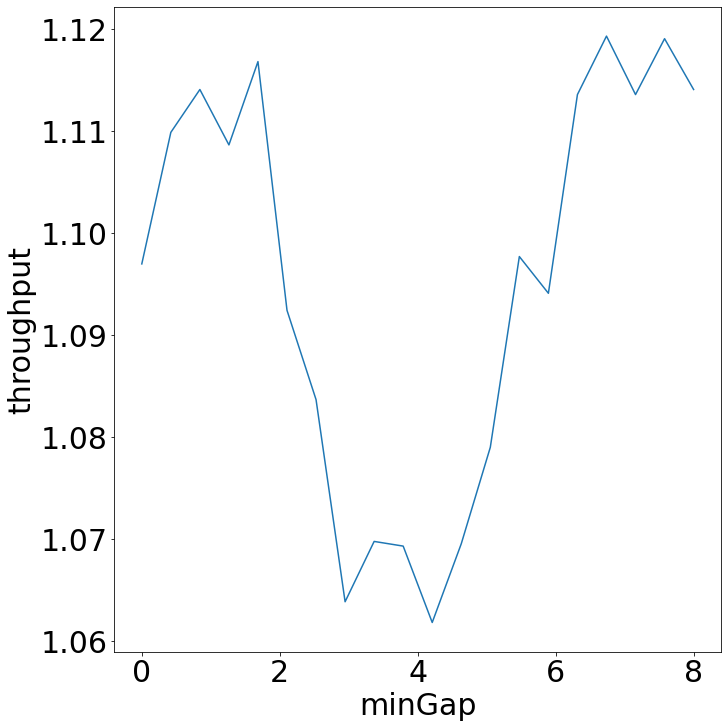

In [55]:
fig, ax = plt.subplots(figsize=(10, 10), layout='constrained')

plt.rcParams['font.size'] = '30'
ax.plot(Y, Z[0,:])
ax.set_xlabel('minGap')
ax.set_ylabel('throughput')


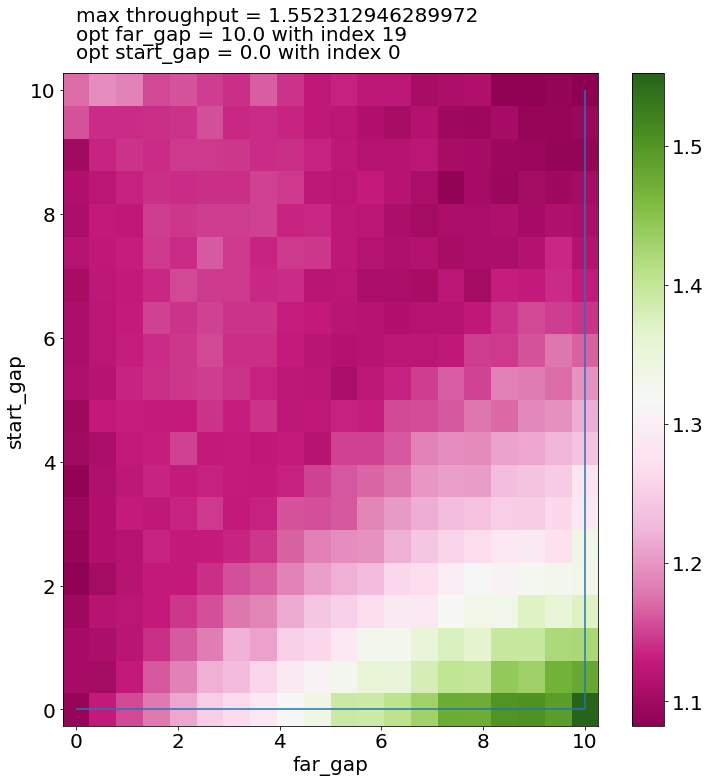

In [77]:
fig, axs = plt.subplots(nrows = 1, ncols = 1,figsize = (12, 12))
plt.rcParams['font.size'] = '20'
xGrid, yGrid = np.meshgrid(X, Y)
xlabel = 'far_gap'
ylabel = 'start_gap'

cmap_set = 'PiYG'
cb = axs.pcolormesh(xGrid, yGrid, np.transpose(Z), cmap = cmap_set)
axs.set_xlabel(xlabel)
axs.set_ylabel(ylabel)
fig.colorbar(cb, ax=axs)

opt_x_ind = np.argmax(np.real(Z))//Z.shape[1]
opt_y_ind = np.argmax(np.real(Z))%Z.shape[1]


axs.text(X[0], Y[len(Y)-1] + (Y[len(Y)-1] - Y[0])*0.05, 
         'opt ' + ylabel + ' = ' + str(Y[opt_y_ind]) + ' with index ' + str(opt_y_ind))
axs.text(X[0], Y[len(Y)-1] + (Y[len(Y)-1] - Y[0])*0.08, 
         'opt ' + xlabel + ' = ' + str(X[opt_x_ind]) + ' with index ' + str(opt_x_ind))
axs.text(X[0], Y[len(Y)-1] + (Y[len(Y)-1] - Y[0])*0.11, 
         'max throughput = ' + str(np.abs(Z[opt_x_ind, opt_y_ind])))


axs.hlines(Y[opt_y_ind], X[0], X[-1])
axs.vlines(X[opt_x_ind], Y[0], Y[-1])



plt.show()

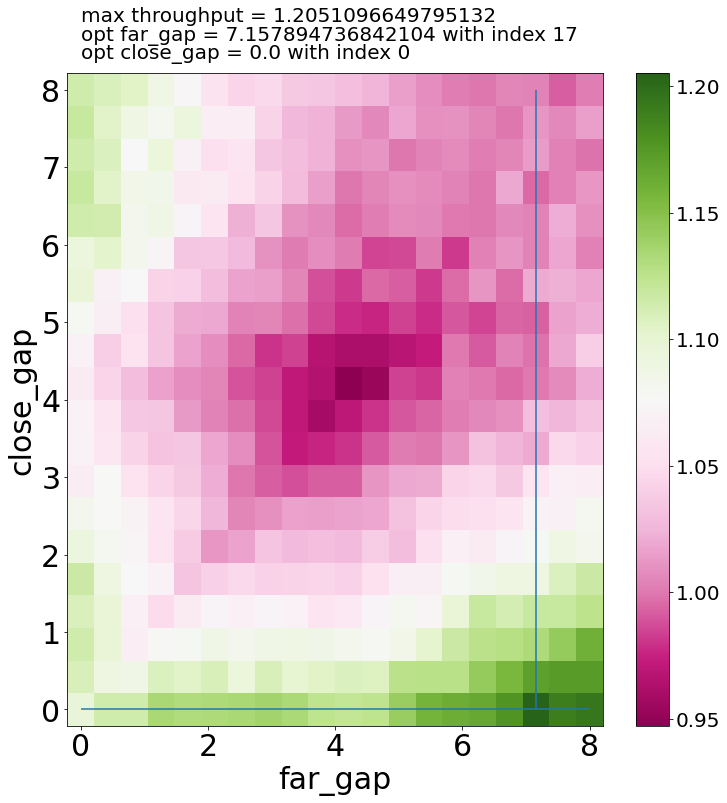

In [68]:
fig, axs = plt.subplots(nrows = 1, ncols = 1,figsize = (12, 12))
plt.rcParams['font.size'] = '20'
xGrid, yGrid = np.meshgrid(X, Y)
xlabel = 'far_gap'
ylabel = 'close_gap'

cmap_set = 'PiYG'
cb = axs.pcolormesh(xGrid, yGrid, np.transpose(Z), cmap = cmap_set)
axs.set_xlabel(xlabel)
axs.set_ylabel(ylabel)
fig.colorbar(cb, ax=axs)

opt_x_ind = np.argmax(np.real(Z))//Z.shape[1]
opt_y_ind = np.argmax(np.real(Z))%Z.shape[1]


axs.text(X[0], Y[len(Y)-1] + (Y[len(Y)-1] - Y[0])*0.05, 
         'opt ' + ylabel + ' = ' + str(Y[opt_y_ind]) + ' with index ' + str(opt_y_ind))
axs.text(X[0], Y[len(Y)-1] + (Y[len(Y)-1] - Y[0])*0.08, 
         'opt ' + xlabel + ' = ' + str(X[opt_x_ind]) + ' with index ' + str(opt_x_ind))
axs.text(X[0], Y[len(Y)-1] + (Y[len(Y)-1] - Y[0])*0.11, 
         'max throughput = ' + str(np.abs(Z[opt_x_ind, opt_y_ind])))


axs.hlines(Y[opt_y_ind], X[0], X[-1])
axs.vlines(X[opt_x_ind], Y[0], Y[-1])



plt.show()

In [3]:
def loss(minGap, test_name, N, stat='mean'):

    if(test_name=='test1'):
        # initial xml encoding

        filedir = './xml_data/test1/'

        netfile = 'test1.net.xml'
        routefile = 'test1.rou.xml'
        configfile = 'test1.sumocfg'
        outpufile = 'test1.statistic.output.xml'

        rtFl = RouteFile(filedir + routefile)

        vtype = 'id0'

        rtFl.setVehicleType(vtype, {
        'accel' : "3.0",
        'decel' : "6.0",
        'length' : "4.0",
        'minGap' : str(minGap),
        'maxSpeed' : "50.0",
        'sigma' : "0"
        })

        rtFl.setVehicleFlow(vtype, source='E0', dest='E3', num=N, dur=100, speed=30)
        rtFl.save()
            
    elif(test_name=='test4'):
        
        test_name = 'test4'

        filedir = './xml_data/' + test_name + '/'

        netfile = test_name + '.net.xml'
        routefile = test_name + '.rou.xml'
        configfile = test_name + '.sumocfg'
        outpufile = test_name + '.statistic.output.xml'

        rtFl = RouteFile(filedir + routefile)

        #1

        vtype = 'id0'

        rtFl.setVehicleType(vtype, {
        'accel' : "3.0",
        'decel' : "6.0",
        'length' : "4.0",
        'minGap' : str(minGap),
        'maxSpeed' : "50.0",
        'sigma' : "0"
        })

        rtFl.setVehicleFlow(vtype, source='E0', dest='E4', num=N, dur=100, speed=13.89)

        #2

        vtype = 'id1'

        rtFl.setVehicleType(vtype, {
        'accel' : "3.0",
        'decel' : "6.0",
        'length' : "4.0",
        'minGap' : str(minGap),
        'maxSpeed' : "50.0",
        'sigma' : "0"
        })

        rtFl.setVehicleFlow(vtype, source='E0', dest='E12', num=N, dur=100, speed=13.89)

        rtFl.save()
        
    elif(test_name=='test5'):

        filedir = './xml_data/' + test_name + '/'

        netfile = test_name + '.net.xml'
        routefile = test_name + '.rou.xml'
        configfile = test_name + '.sumocfg'
        outpufile = test_name + '.statistic.output.xml'

        rtFl = RouteFile(filedir + routefile)

        #1

        vtype = 'id0'

        rtFl.setVehicleType(vtype, {
        'accel' : "3.0",
        'decel' : "6.0",
        'length' : "4.0",
        'minGap' : str(minGap),
        'maxSpeed' : "50.0",
        'sigma' : "0"
        })

        rtFl.setVehicleFlow(vtype, source='E0', dest='E4', num=N, dur=100, speed=13)

        #2

        vtype = 'id1'

        rtFl.setVehicleType(vtype, {
        'accel' : "3.0",
        'decel' : "6.0",
        'length' : "4.0",
        'minGap' : str(minGap),
        'maxSpeed' : "50.0",
        'sigma' : "0"
        })

        rtFl.setVehicleFlow(vtype, source='E0', dest='E12', num=N, dur=100, speed=13)
        
        #3

        vtype = 'id2'

        rtFl.setVehicleType(vtype, {
        'accel' : "3.0",
        'decel' : "6.0",
        'length' : "4.0",
        'minGap' : str(minGap),
        'maxSpeed' : "50.0",
        'sigma' : "0"
        })

        rtFl.setVehicleFlow(vtype, source='E0', dest='E14', num=N, dur=100, speed=13)

        rtFl.save()

        
    if stat == 'mean':
        generateConfigFile(
        filedir + configfile, 
        netfile,
        routefile,
        output=['statistic']#, 'tripinfo']
        )

        loadConfig(filedir + test_name + '.sumocfg')
        # xml reading
        f_name = filedir + outpufile
        with open(f_name, 'r') as file:
            data = file.read()
        data = BeautifulSoup(data, "xml")
        # average output flow is equal to N/T, where T – full model time
        #ans = float(data('vehicleTripStatistics')[0]['duration'])
        ans = N/float(data('performance')[0]['duration'])

        return ans

    elif stat == 'median':
        generateConfigFile(
        filedir + configfile, 
        netfile,
        routefile,
        output=['tripinfo']
        )

        loadConfig(filedir + test_name + '.sumocfg')
        # xml reading
        f_name = filedir + test_name + '.tripinfo.output.xml'
        with open(f_name, 'r') as file:
            data = file.read()
        data = BeautifulSoup(data, "xml")

        arr = []
        for sruct in data('tripinfo'):
            arr.append(float(sruct['arrival']))

        n = 5
        arr = np.array(arr)
        step = max(arr)/n
        rates = []
        for i in range(n):
            temp = arr[arr > i*step]
            temp = temp[temp <= (i+1)*step]
            rates.append(temp.size)
        return np.median(rates)


    elif stat == 'car_time':
        generateConfigFile(
        filedir + configfile, 
        netfile,
        routefile,
        output=['tripinfo']
        )

        loadConfig(filedir + test_name + '.sumocfg')
        # xml reading
        f_name = filedir + outpufile
        with open(f_name, 'r') as file:
            data = file.read()
        data = BeautifulSoup(data, "xml")
        # average output flow is equal to N/T, where T – full model time
        ans = float(data('vehicleTripStatistics')[0]['duration'])
        
        return 1/ans
    
    else:
        raise Exception('Undefined statistics!')

In [72]:
# graphs

X = np.linspace(0, 8, 300)
Y = np.zeros(X.shape[0])

for i in tqdm.tqdm(range(X.shape[0])):
    
    Y[i] = loss(X[i], 'test4', 250)

In [70]:
np.savez('res_data/' + 'test4_3', X=X, Y=Y, N = 250, speed=30, maxspeed=50)

Text(0, 0.5, 'throughput')

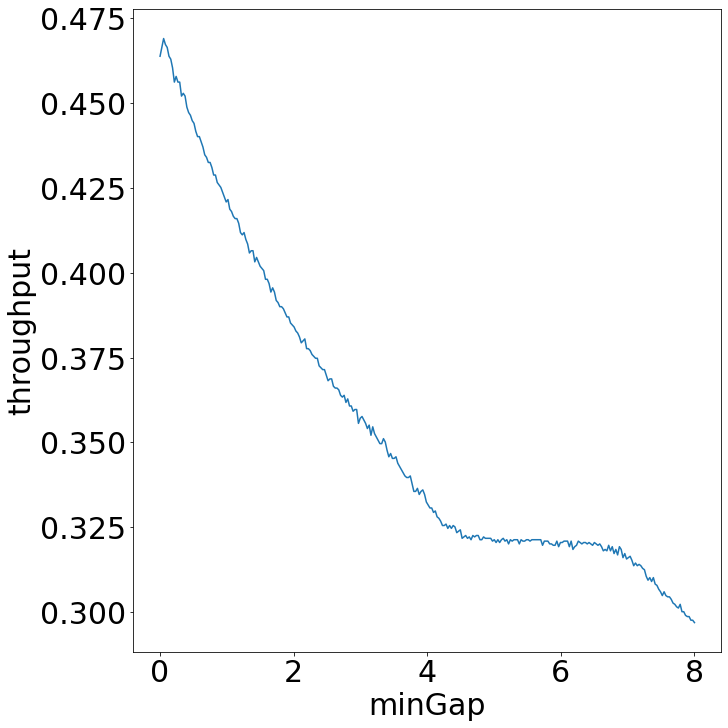

In [71]:
fig, ax = plt.subplots(figsize=(10, 10), layout='constrained')

plt.rcParams['font.size'] = '30'
ax.plot(X, Y)
ax.set_xlabel('minGap')
ax.set_ylabel('throughput')


Text(0, 0.5, 'throughput')

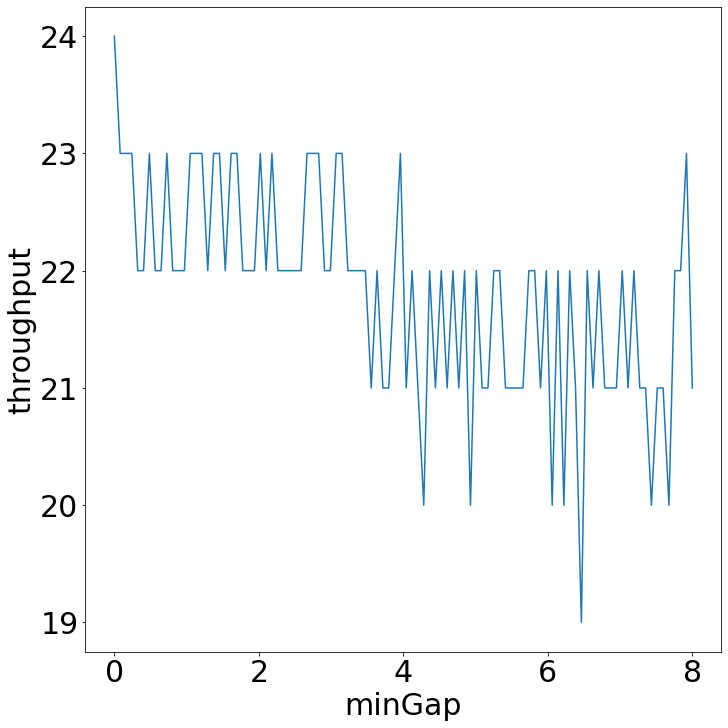

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), layout='constrained')

plt.rcParams['font.size'] = '30'
ax.plot(X, Y)
ax.set_xlabel('minGap')
ax.set_ylabel('throughput')


In [ ]:
# simple optimization

bounds = (, )

sol = sc.optimize.dual_annealing(loss, bounds=[bounds], args=['road', inflow], maxiter=200)
ans = sol.x

TypeError: dual_annealing() got multiple values for argument 'bounds'

In [6]:
# предыдущее, у меня не работает, это, вроде работает
def inverse_loss(minGap: float, test_name: str, N:int, stat:str='mean') -> float:
    # print(minGap)
    return -loss(minGap, test_name, N, stat=stat)
    # return (minGap - 10)**2 + 1

def dumb_best_dist(test_name: str, n_cars: int) -> float:
    ans = sc.optimize.minimize(inverse_loss, 0.5, args=(test_name, n_cars), bounds=[(0.0, None)])
    print(ans)

dumb_best_dist('test5', 250)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -0.23651844843897823
        x: [ 5.000e-01]
      nit: 0
      jac: [ 0.000e+00]
     nfev: 2
     njev: 1
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>


# Намашинлерним говна?

In [139]:
# ВНИМАНИЕ тут создается лосс без названия дороги
def make_loss_for_model(test_name:str) -> callable:
    def tmp_func(dist, inflow):
        return loss(dist, test_name, inflow)
    return tmp_func

# например вы хотите лосс для 5-ого теста, тогда просто используйте
use_this_loss = make_loss_for_model('test5')
use_this_loss(3.8, 250)

0.23651844843897823

In [1]:
from model import OptimalLoss_Q, OptimalDist

In [ ]:
"""
Как работать с моделями
1) Для начала надо их заимпортить, используйте код выше.
OptimalLoss_Q - подобие обучения с подкреплением
OptimalDist   - бустинг, который обучается на том, что посчитал

2) Потом надо создать объект с нужной Вам сеткой. Что такое сетка?
Это значения количества машин и мощностей потоков, которые будут использоваться для обучения.

Их формат: grid_params = [(min_dist, max_dist, dist_step), (min_inflow, max_inflow, inflow_step)], можете юзать другие контейнеры, наверное, не сломается, но это не точно

Чем меньше узлов в сетке, тем быстрее обучится модель
Зачем Вам это знать?
Да потому, что если Вы попросите предсказать что-то для данных, не лежащих в сетке, модель высрет хуйню :)

Поэтому ВЫБЕРЕТЕ MIN И MAX для КАЖДОГО параметра, их всего два, это не сложно, наверное
ШАГ параметра выбирайте относительно скорости работы, если считается уже 5 мин, то можно увеличить шаг

3) Oбучите модель с помощью метода fit
На вход отдайте ему make_loss_for_model('ИМЯ_ТЕСТА')
Например, obj.fit(make_loss_for_model('test_name'))

4) Сходите отдохнуть, пока модель обучается

5) Когда модель обучилась, ее можно попросить что-то предсказать с помощью метода predict
На вход скормите ему значение потока (inflow)
Например, obj.predict(some_inflow)

6) Наслаждайтесь ответом



Если что-то пойдет не так или появится какой-то error, я не виноват, это все Артем, пишите ему
"""

'\nКак работать с моделями\n1) Для начала надо их заимпортить, используйте код выше.\n\n2) Потом надо создать объект с нужной Вам сеткой. Что такое сетка?\nЭто значения количества машин и мощностей потоков, которые будут использоваться для обучения.\n\nИх формат: grid_params = [(min_dist, max_dist, dist_step), (min_inflow, max_inflow, inflow_step)], можете юзать другие контейнеры, наверное, не сломается, но это не точно\n\nЧем меньше узлов в сетке, тем быстрее обучится модель\nЗачем Вам это знать?\n'

In [11]:
# Example
grid_params = [(0, 11, 0.5), (50, 151, 25)]  # сначала дистанция машин, потом поток
obj = OptimalDist(grid_params=grid_params)
obj.fit(make_loss_for_model('test'))
obj.predict(75)